SPAM detection in Text Messages

Dataset : https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer

# train test split and cross validation
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC

In [2]:
sms_df = pd.read_csv("spam.csv", encoding="latin-1")
sms_df = sms_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms_df = sms_df.rename(columns={"v1": "target", "v2": "sms"})

In [3]:
!pip install wordcloud

In [4]:
test_ham = sms_df.groupby(['target'])['sms'].apply(','.join).reset_index().loc[0]["sms"]
test_spam = sms_df.groupby(['target'])['sms'].apply(','.join).reset_index().loc[1]["sms"]

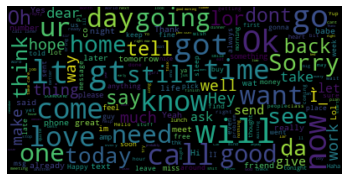

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_ham = WordCloud(max_font_size=40).generate(test_ham)
plt.figure()
plt.imshow(wordcloud_ham, interpolation="bilinear")
plt.axis("off")
plt.show()

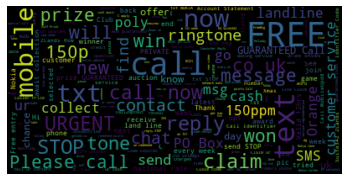

In [6]:
wordcloud_spam = WordCloud(max_font_size=40).generate(test_spam)
plt.figure()
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(sms_df["sms"],sms_df["target"],test_size=0.2, random_state=123)

In [9]:
vect = CountVectorizer(max_features = 10)
X_counts = vect.fit_transform(X_train)

bow_df = pd.DataFrame(X_counts.toarray(), columns = sorted(vect.vocabulary_), index = X_train)
bow_df.shape

(4457, 10)

In [10]:
pipeline = make_pipeline(CountVectorizer(binary = True), SVC())
scores = cross_validate(pipeline, X_train, y_train, return_train_score = True)
scores_df = pd.DataFrame(scores)
scores_df.mean()

fit_time       0.732120
score_time     0.164462
test_score     0.979133
train_score    0.995961
dtype: float64

In [16]:
param_grid = {"svc__gamma": 10.0 ** np.arange(-3, 3),
              "svc__C": 10.0 ** np.arange(-3, 3),
              "countvectorizer__max_features": [10,20,30,100],
             }

In [17]:
pipeline = make_pipeline(CountVectorizer(binary = True), SVC())
random_search = RandomizedSearchCV(pipeline, param_distributions = param_grid, cv = 10, n_jobs = -1, n_iter = 10, return_train_score = True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer(binary=True)),
                                             ('svc', SVC())]),
                   n_jobs=-1,
                   param_distributions={'countvectorizer__max_features': [10,
                                                                          20,
                                                                          30,
                                                                          100],
                                        'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'svc__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
                   return_train_score=True)

In [18]:
print("Best Params: ",random_search.best_params_)
print("Best Validation Score: ",random_search.best_score_)
pd.DataFrame(random_search.cv_results_).set_index("rank_test_score").sort_index()

Best Params:  {'svc__gamma': 0.01, 'svc__C': 100.0, 'countvectorizer__max_features': 30}
Best Validation Score:  0.9293253388421425


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__gamma,param_svc__C,param_countvectorizer__max_features,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,,,,,
1,0.488453,0.011197,0.035516,0.002063,0.01,100,30,"{'svc__gamma': 0.01, 'svc__C': 100.0, 'countve...",0.934978,0.932735,...,0.935428,0.938918,0.939666,0.939666,0.937921,0.939182,0.939182,0.937438,0.938200,0.001304
2,0.807644,0.039699,0.036426,0.000797,0.1,100,30,"{'svc__gamma': 0.1, 'svc__C': 100.0, 'countvec...",0.923767,0.932735,...,0.974819,0.973573,0.974570,0.974819,0.971827,0.974327,0.974826,0.972333,0.973575,0.001227
3,0.537429,0.012850,0.043071,0.001675,1,100,20,"{'svc__gamma': 1.0, 'svc__C': 100.0, 'countvec...",0.932735,0.921525,...,0.959860,0.959362,0.959362,0.961107,0.956619,0.958873,0.958126,0.958375,0.958841,0.001138
4,0.696011,0.022814,0.053114,0.000949,100,1,20,"{'svc__gamma': 100.0, 'svc__C': 1.0, 'countvec...",0.926009,0.921525,...,0.959860,0.959362,0.959362,0.961107,0.956619,0.958873,0.958126,0.958375,0.958841,0.001138
5,0.375818,0.005124,0.035189,0.001228,0.01,1,20,"{'svc__gamma': 0.01, 'svc__C': 1.0, 'countvect...",0.917040,0.921525,...,0.908252,0.908252,0.910745,0.907255,0.906756,0.909521,0.904038,0.908026,0.907536,0.001902
6,0.943753,0.102332,0.032977,0.001277,0.1,100,10,"{'svc__gamma': 0.1, 'svc__C': 100.0, 'countvec...",0.876682,0.876682,...,0.876589,0.876091,0.874844,0.877088,0.877836,0.875374,0.874377,0.875125,0.875676,0.001109
7,0.852460,0.051072,0.081100,0.003549,10,0.1,30,"{'svc__gamma': 10.0, 'svc__C': 0.1, 'countvect...",0.863229,0.863229,...,0.862129,0.862378,0.862378,0.862378,0.862378,0.862164,0.862164,0.862164,0.862239,0.000114
7,0.412106,0.018429,0.042476,0.004565,0.1,0.01,20,"{'svc__gamma': 0.1, 'svc__C': 0.01, 'countvect...",0.863229,0.863229,...,0.862129,0.862378,0.862378,0.862378,0.862378,0.862164,0.862164,0.862164,0.862239,0.000114
7,0.303794,0.016870,0.027491,0.004531,0.001,0.001,10,"{'svc__gamma': 0.001, 'svc__C': 0.001, 'countv...",0.863229,0.863229,...,0.862129,0.862378,0.862378,0.862378,0.862378,0.862164,0.862164,0.862164,0.862239,0.000114


In [19]:
random_search.best_estimator_.fit(X_test,y_test)
print("Score on ramdom search model with best estimator",random_search.best_estimator_.score(X_test,y_test))

Score on ramdom search model with best estimator 0.9488789237668162
